# Jaleel Walter Henry Savoy
### Data Analysis Assignment Lesson 5 - Principal Components Analysis

## Introduction
&ensp; This report focuses on analyzing and applying Principal Component Analysis to a dataset from the Agricultural Research Service of the United States Department of Agriculture (USDA). The dataset was extracted from a food composition database known as the *USDA National Nutrient Database for Standard Reference*. The objective of this study is to reduce the dimensions of the data set by finding the smallest number of principal components that still adequately explains enough of the data's variability to represent and capture interpretable combinations of the nutrients. There is quite a bit of subjectivity involved in this process, but this study will lay out how and why decisions were made regarding the dimensionality reduction of the data. 

&ensp; To reiterate, this study will address the following research questions:
* How many principal components would you need to adequately represent this data in a lower dimension?
* Are the first few principal components capturing any interpretable combinations of the nutrients?
* What are some interesting combinations of nutrients captured?


### Data Source
&ensp; The data analyzed in this study is from the 28th release of the USDA National Nutrient Database for Standard Reference, which was originally released in September of 2015 and slightly revised in May of 2016. These database releases have been published online since 1992 and are used as a major, widespread source of food nutritional data; from fast food chains to various research groups this data is used as a standard reference for food composition. 

&ensp; The data set includes 2223 observations and 51 features. This study actually only uses a subset of those features that represent nutrient variables (46 of the 51), so the final data frame is structured so that each observation is a unique food item (row name) and the features are various nutritional values associated with the food item. 

**Data Fields and Descriptions:**

 Feature Name | Description | Data Frame Column Name 
 --- | --- | --- 
Water | Water (g/100 g) | Water_(g)
Energ_Kcal | Food energy (kcal/100 g) | Energ_Kcal
Protein | Protein (g/100 g) | Protein_(g)
Lipid_Tot | Total lipid (fat) (g/100 g) | Lipid_Tot_(g)
Ash | Ash (g/100 g) | Ash_(g)
Carbohydrt | Carbohydrate, by difference (g/100 g) | Carbohydrt_(g)
Fiber_TD | Total dietary fiber (g/100 g) | Fiber_TD_(g)
Sugar_Tot | Total sugars (g/100 g) | Sugar_Tot_(g)
Calcium | Calcium (mg/100 g) | Calcium_(mg)
Iron N | Iron (mg/100 g) | Iron_(mg)
Magnesium | Magnesium (mg/100 g) | Magnesium_(mg)
Phosphorus | Phosphorus (mg/100 g) | Phosphorus_(mg)
Potassium | Potassium (mg/100 g) | Potassium_(mg)
Sodium | Sodium (mg/100 g) | Sodium_(mg)
Zinc | Zinc (mg/100 g) | Zinc_(mg)
Copper | Copper (mg/100 g) | Copper_(mg)
Manganese | Manganese (mg/100 g) | Manganese_(mg)
Selenium | Selenium (μg/100 g) | Selenium_(µg)
Vit_C | Vitamin C (mg/100 g) | Vit_C_(mg)
Thiamin | Thiamin (mg/100 g) | Thiamin_(mg)
Riboflavin | Riboflavin (mg/100 g) | Riboflavin_(mg)
Niacin | Niacin (mg/100 g) | Niacin_(mg)
Panto_acid | Pantothenic acid (mg/100 g) | Panto_Acid_(mg)
Vit_B6 | Vitamin B6 (mg/100 g) | Vit_B6_(mg)
Folate_Tot | Folate, total (μg/100 g) | Folate_Tot_(µg)
Folic_acid | Folic acid (μg/100 g) | Folic_Acid_(µg)
Food_Folate | Food folate (μg/100 g) | Food_Folate_(µg)
Folate_DFE | Folate (μg dietary folate equivalents/100 g) | Folate_DFE_(µg)
Choline_Tot | Choline, total (mg/100 g) | Choline_Tot_(mg)
Vit_B12 | Vitamin B12 (μg/100 g) | Vit_B12_(µg)
Vit_A_IU | Vitamin A (IU/100 g) | Vit_A_IU
Vit_A_RAE | Vitamin A (μg retinol activity equivalents/100g) | Vit_A_RAE
Retinol | Retinol (μg/100 g) | Retinol_(µg)
Alpha_Carot | Alpha-carotene (μg/100 g) | Alpha_Carot_(µg)
Beta_Carot | Beta-carotene (μg/100 g) | Beta_Carot_(µg)
Beta_Crypt | Beta-cryptoxanthin (μg/100 g) | Beta_Crypt_(µg)
Lycopene | Lycopene (μg/100 g) | Lycopene_(µg)
Lut+Zea| Lutein+zeazanthin (μg/100 g) | Lut+Zea_(µg)
Vit_E  | Vitamin E (alpha-tocopherol) (mg/100 g) | Vit_E_(mg)
Vit_D_mcg | Vitamin D (μg/100 g) | Vit_D_µg
Vit_D_IU | Vitamin D (IU/100 g) | Vit_D_IU
Vit_K | Vitamin K (phylloquinone) (μg/100 g) | Vit_K_(µg)
FA_Sat | Saturated fatty acid (g/100 g) | FA_Sat_(g) 
FA_Mono | Monounsaturated fatty acids (g/100 g) | FA_Mono_(g)
FA_Poly | Polyunsaturated fatty acids (g/100 g) | FA_Poly_(g)
Cholestrl | Cholesterol (mg/100 g) | Cholestrl_(mg)

## Preliminary Data Exploration
&ensp; Before exploring the data using PCA, a preliminary data exploration will be performed to get a general understanding of the data and note any peculiarities.

### Linear Correlation Among Features
&ensp; There are many 11 variables that have a relatively high linear correlation with at least one other variable; a feature was to determined "high" linear correlation with another feature if the Pearson coefficient between it and any other feature had an absolute value of 0.75 or greater. Those 11 variables are water, energy (kilocalories), total Folate, dietary Folate equivalents, total lipids, Phosphorus, total Choline, Vitamin A (retinol activity equivalents), Vitamin A (international units), Vitamin D, and Sodium. Immediately it is clear to see some of the collinear features; intuitively water has a negative linear association with energy (kilocalories), while energy has a positive linear association with total lipid (fat) content. Some other noteworthy linear associations between the features:
* The two Folate features (total Folate and dietary Folate equivalents) have a nearly perfect positive linear association
* The two Vitamin A features (Vitamin A retinol activity equivalents and Vitamin A international units) and dietary Folate equivalents) have a positive linear association
* Water and Lipids have a negative linear association

&ensp; These linear correlations among the features all seem straightforward and intuitive, but it is important to note three features in particular exhibit multicollinearity amongst themselves: water content, energy, and total lipid content.

### The Scale of the Features
&ensp; After analyzing the numerical summary of the data set and visually assessing the first 10 rows, the last 10 rows, and a random sample of 10 rows from the data set, it becomes clear that the features are of different scales. Since the goal is to later perform dimensionality reduction via PCA, this presents a problem due to the way Singular Value Decomposition is computed and used during PCA; having greatly different means and variances for each feature would interfere with a proper extraction of the principal components.

### Data Preprocessing
After exploring the data, and as mentioned above, the scale of the features poses a problem for PCA. An obvious solution to this problem is to center and scale the data so that the features will have a mean of zero (${\mu = 0}$) and a standard deviation of one (${\sigma = 0}$); this is the action taken for this study. The data will be centered and scaled prior to using it as input into the PCA procedure.

## Methods Overview
&ensp; The focus of this study is to reduce the dimensionality of the USDA food composition data, while adequately representing the data in the lower dimension. To do this, PCA will be performed; ideally, some interpretable combinations  of the nutrients will be uncovered through this process.

### PCA Background
&ensp; PCA is a very common and powerful feature extraction technique for performing (linear) dimension reduction that allows data to be rotated and projected along axes where there is the most variation. The idea is that, typically, the important characteristics of the data are concentrated in the first handful of principal components; so while adding more principal components provides additional information, it reaches a point the marginal increase in variance explained is not worth the added noise to the data. Additionally, PCA can be used to reduce the computational expense of handling wide data sets (many columns) and to visualize high-dimensional data in lower dimensions.

&ensp; PCA will be useful for this data particularly because of the earlier mentioned moderately strong linear correlations between 11 of the 46 variables. PCA will allow the feature set to be reduced while still containing much of the information of the original set.

## Analysis
&ensp; Performing PCA was fairly straightforward since the data was already scaled and centered. In the Appendix, the rotations matrix (which show the principal component loadings) is displayed along with a summary of the performed PCA. Looking at the summary of the PCA, it is clear that that majority of the variance explained in the data is concentrated in the first 6 principal components; out of 46 principal components, the cumulative proportion of variance explained at the 6th principal component is 52.6%, 80.7% at the 16th principal component, and 90.5% at the 22nd principal component. Interestingly, the cumulative proportion of variance explained at the 27th principal component is 95.15%, so it is nearly as informative as the original set. It is important to note that the marginal proportion of variance explained flattens out and that observation is corroborated by **Figure 1, Figure 2, and Figure 3** in the Appendix, which shows that the gradient of both the marginal and the cumulative proportion of variance explained decreases as more principal components are considered.

&ensp; In **Figure 1**, which shows the marginal proportion of variance explained by each principal component, there is a vertical line at the 11th principal component and a horizontal line corresponding to a marginal proportion of explained variance of 2.75%. This seems to be a good cut-off point, because moving right along the x-axis shows that the change in Y-values, the marginal proportion of variance explained, experiences smaller decreases. It would seem the benefits of explaining more variance with additional principal components is outweighed by the added dimensions (as well as noise) to the data. To further examine the benefit and drawbacks of adding more principal components, it is important to look at **Figure 3**. In **Figure 3**, which shows the cumulative proportion of variance explained at each principal component, it is clear to see that the amount of variance explained is in the first 11 principal components is far greater than the variance explained in the remaining principal components; principal components 1 through 11 explain about 70% of the variance, while principal components 12-23 explain about 20% of the variance.

&ensp; Overall, the first 11 principal components of the data are sufficient for this analysis, because they explain the overwhelming majority of the variance in the data and because the marginal benefits of adding more principal components are greatly diminished after the 11th principal component.

## Conclusion
&ensp; The results of the analysis above support the claim that the first 11 principal components adequately represent the data in a lower dimension, while retaining approximately 70% of the information from the original data set. Additionally, plotting the data points in two dimensions (using principal components one and two along with the loadings), uncovers some concrete, interpretable combinations of nutrients. Plotting all 2223 observations makes for a messy visualization, but even in **Figure 4** of the Appendix there are clear, interpretable groupings towards the extremes; one grouping is of high protein, zinc, and choline foods, and it includes: dried egg yolk, dried egg whites, various beef meat products, and brazil nut. 

&ensp; In order to get better visualization of the analysis, a random subset of 20 food items was analyzed in **Figure 5** of the Appendix. In this plot, two main groupings are clearly observed. There is a grouping of high carbohydrate and energy foods, which includes: English muffins, popcorn cakes, hamburger/hotdog rolls, M&M and Cheddar Cheese Pretzel snacks, ramen noodle soups, and more. The other grouping is of high protein, zinc, choline, B12, and B6, which includes: boneless beef chuck-eye country-style ribs, beef shoulder pot roast, pork loin country-style ribs, and more.

## Citations
Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
(2017). ISLR: Data for an Introduction to Statistical Learning with
Applications in R. R package version 1.2.
https://CRAN.R-project.org/package=ISLR

Hadley Wickham (2017). tidyverse: Easily Install and Load the
'Tidyverse'. R package version 1.2.1.
https://CRAN.R-project.org/package=tidyverse

Max Kuhn. Contributions from Jed Wing, Steve Weston, Andre Williams,
Chris Keefer, Allan Engelhardt, Tony Cooper, Zachary Mayer, Brenton
Kenkel, the R Core Team, Michael Benesty, Reynald Lescarbeau, Andrew
Ziem, Luca Scrucca, Yuan Tang, Can Candan and Tyler Hunt. (2019).
caret: Classification and Regression Training. R package version
6.0-84. https://CRAN.R-project.org/package=caret

Taiyun Wei and Viliam Simko (2017). R package "corrplot":
Visualization of a Correlation Matrix (Version 0.84). Available from
https://github.com/taiyun/corrplot

US Department of Agriculture, Agricultural Research Service, Nutrient Data Laboratory.
USDA National Nutrient Database for Standard Reference, Release 28 (Slightly revised).
Version Current: May 2016. Internet: http://www.ars.usda.gov/ba/bhnrc/ndl 

Yuan Tang, Masaaki Horikoshi, and Wenxuan Li. "ggfortify: Unified
Interface to Visualize Statistical Result of Popular R Packages." The
R Journal 8.2 (2016): 478-489.

In [66]:
##############################################################################
# Data Loading and Preparation
##############################################################################
SR = read.table("ABBREV.txt", header=F, row.names=1, sep="^", quote="~")
SR = na.omit(SR) # remove rows with missing values
SR = SR[row.names(SR) != "13352",] # remove "duplicate" entry
row.names(SR) = SR[,1] # set more meaningful row names
SR = SR[,-1]
names(SR) = c("Water_(g)", "Energ_Kcal", "Protein_(g)", "Lipid_Tot_(g)", "Ash_(g)",
              "Carbohydrt_(g)", "Fiber_TD_(g)", "Sugar_Tot_(g)", "Calcium_(mg)", "Iron_(mg)",
              "Magnesium_(mg)", "Phosphorus_(mg)", "Potassium_(mg)", "Sodium_(mg)", "Zinc_(mg)",
              "Copper_(mg)", "Manganese_(mg)", "Selenium_(µg)", "Vit_C_(mg)", "Thiamin_(mg)",
              "Riboflavin_(mg)", "Niacin_(mg)", "Panto_Acid_(mg)", "Vit_B6_(mg)", "Folate_Tot_(µg)",
              "Folic_Acid_(µg)", "Food_Folate_(µg)", "Folate_DFE_(µg)", "Choline_Tot_(mg)", 
              "Vit_B12_(µg)", "Vit_A_IU", "Vit_A_RAE", "Retinol_(µg)", "Alpha_Carot_(µg)",
              "Beta_Carot_(µg)", "Beta_Crypt_(µg)", "Lycopene_(µg)", "Lut+Zea_(µg)", "Vit_E_(mg)",
              "Vit_D_µg", "Vit_D_IU", "Vit_K_(µg)", "FA_Sat_(g)", "FA_Mono_(g)", "FA_Poly_(g)", 
              "Cholestrl_(mg)", "GmWt_1", "GmWt_Desc1", "GmWt_2", "GmWt_Desc2","Refuse_Pct")
SRp = SR[,c(1:46)] # restrict to just the nutrient variables

[1] 2223   51

[1] 2223   46

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Lycopene_(µg),Lut+Zea_(µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0,0.06,24,0.02,...,0,0,2.32,0.0,0,7.0,51.368,21.021,3.043,215
"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0,0.06,23,0.05,...,0,13,1.37,0.0,0,4.6,45.390,19.874,3.331,225
"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0,0.00,4,0.00,...,0,0,2.80,0.0,0,8.6,61.924,28.732,3.694,256
"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0,0.50,528,0.31,...,0,0,0.25,0.5,21,2.4,18.669,7.778,0.800,75
"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0,0.51,674,0.43,...,0,0,0.26,0.5,22,2.5,18.764,8.598,0.784,94
"CHEESE,BRIE",48.42,334,20.75,27.68,2.70,0.45,0,0.45,184,0.50,...,0,0,0.24,0.5,20,2.3,17.410,8.013,0.826,100
"CHEESE,CAMEMBERT",51.80,300,19.80,24.26,3.68,0.46,0,0.46,388,0.33,...,0,0,0.21,0.4,18,2.0,15.259,7.023,0.724,72
"CHEESE,CHEDDAR",37.02,404,22.87,33.31,3.71,3.09,0,0.48,710,0.14,...,0,0,0.71,0.6,24,2.4,18.867,9.246,1.421,99
"CHEESE,COLBY",38.20,394,23.76,32.11,3.36,2.57,0,0.52,685,0.76,...,0,0,0.28,0.6,24,2.7,20.218,9.280,0.953,95
"CHEESE,COTTAGE,CRMD,LRG OR SML CURD",79.79,98,11.12,4.30,1.41,3.38,0,2.67,83,0.07,...,0,0,0.08,0.1,3,0.0,1.718,0.778,0.123,17


,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Lycopene_(µg),Lut+Zea_(µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
"GARLIC BREAD,FRZ",31.78,350,8.36,16.61,1.54,41.72,2.5,3.69,27,3.05,...,0,25,1.18,0.2,9,29.5,5.281,4.669,5.437,0
"SUNFLOWER SD KRNLS,OIL RSTD,W/SALT",1.54,592,20.06,51.30,4.22,22.89,10.6,3.11,87,4.28,...,0,0,36.33,0.0,0,3.1,7.068,8.063,34.294,0
"DESSERTS,PUDD,COCNT CRM,DRY MIX,INST",2.20,415,0.90,10.00,3.40,83.50,4.0,64.00,8,0.72,...,0,0,0.08,0.0,0,0.1,10.000,0.000,0.000,0
"BEEF,LOIN,TENDERLOIN RST,BNLESS,L & F,0"" FAT,CHOIC,CKD,RSTD",63.70,188,27.26,8.82,1.24,0.00,0.0,0.00,14,3.24,...,0,0,0.11,0.1,3,1.6,3.533,3.937,0.617,82
"BREAD,RED-CAL,OAT BRAN",46.00,201,8.00,3.20,1.50,41.30,12.0,3.52,57,3.15,...,0,42,0.28,0.0,0,1.7,0.445,0.684,1.670,0
"BACON,MEATLESS",48.98,309,11.69,29.52,4.50,5.31,2.6,0.00,23,2.41,...,0,0,6.90,0.0,0,0.0,4.622,7.095,15.441,0
"BEEF,CHK EYE CTRY-STYLE RIBS,BNL,LN & FAT,0"" FAT,ALL GR, CKD",51.91,296,27.69,20.55,0.96,0.00,0.0,0.00,16,2.49,...,0,0,0.09,0.1,6,1.6,9.009,9.997,0.884,96
"TURNIPS,CKD,BLD,DRND,WO/SALT",93.60,22,0.71,0.08,0.55,5.06,2.0,2.99,33,0.18,...,0,0,0.02,0.0,0,0.1,0.008,0.005,0.042,0
"SALAD DRSNG,MAYO,REG",21.65,680,0.96,74.85,1.98,0.57,0.0,0.57,8,0.21,...,0,12,3.28,0.2,7,163.0,11.703,16.843,44.690,42
"BREAD,OATMEAL",36.70,269,8.40,4.40,2.00,48.50,4.0,8.14,66,2.70,...,0,72,0.48,0.0,0,1.5,0.703,1.578,1.702,0


,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Lycopene_(µg),Lut+Zea_(µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
"BEVERAGES,CRANBERRY-APPLE JUC DRK,LO CAL,W/ VIT C ADDED",95.20,19,0.10,0.00,0.12,4.70,0.1,4.60,10,0.06,...,0,19,0.27,0.0,0,1.1,0.000,0.000,0.000,0
"ROLLS,PUMPERNICKEL",32.00,276,10.80,2.80,2.53,51.87,5.4,0.40,67,2.78,...,0,106,0.63,0.0,0,1.5,0.495,0.609,1.184,0
"BEVERAGES,ABBOTT,ENSURE PLUS,RTD",69.84,141,5.16,4.52,0.60,19.88,0.0,8.33,79,1.79,...,0,0,1.34,1.0,40,7.9,0.574,1.095,2.655,2
"ICE CREAMS,CHOC,RICH",57.52,251,4.72,16.98,1.00,19.78,0.9,17.35,142,1.02,...,0,2,0.46,0.3,12,1.5,10.377,4.794,0.658,60
"OIL,CORN,PEANUT,AND OLIVE",0.00,884,0.00,100.00,0.00,0.00,0.0,0.00,0,0.13,...,0,0,14.78,0.0,0,21.0,14.367,48.033,33.033,0
"PUDDINGS,CHOC FLAVOR,LO CAL,INST,DRY MIX",4.20,356,5.30,2.40,9.90,78.20,6.1,0.70,126,3.11,...,0,7,0.02,0.0,0,0.4,0.984,1.154,0.131,0
"PIE FILLINGS,BLUEBERRY,CND",54.66,181,0.41,0.20,0.35,44.38,2.6,37.75,27,0.80,...,0,33,0.23,0.0,0,3.9,0.000,0.000,0.000,0
"BEVERAGES,COCKTAIL MIX,NON-ALCOHOLIC,CONCD,FRZ",28.24,287,0.08,0.01,0.07,71.60,0.0,24.53,2,0.04,...,0,12,0.02,0.0,0,0.0,0.003,0.001,0.009,0
"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX",6.80,365,10.08,3.00,5.70,74.42,10.1,0.70,50,3.87,...,0,9,0.02,0.0,0,0.5,1.578,1.150,0.130,0
"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY MIX",6.84,350,0.81,0.90,6.80,84.66,0.8,0.90,143,0.38,...,0,0,0.08,0.0,0,1.7,0.099,0.116,0.433,0


   Water_(g)       Energ_Kcal     Protein_(g)    Lipid_Tot_(g)   
 Min.   : 0.00   Min.   :  0.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:41.00   1st Qu.: 83.0   1st Qu.: 2.21   1st Qu.:  0.74  
 Median :64.96   Median :182.0   Median :10.08   Median :  5.34  
 Mean   :57.57   Mean   :210.9   Mean   :12.85   Mean   : 10.15  
 3rd Qu.:79.00   3rd Qu.:292.0   3rd Qu.:22.46   3rd Qu.: 13.37  
 Max.   :99.90   Max.   :902.0   Max.   :85.60   Max.   :100.00  
    Ash_(g)       Carbohydrt_(g)   Fiber_TD_(g)    Sugar_Tot_(g)   
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 0.840   1st Qu.: 0.00   1st Qu.: 0.000   1st Qu.: 0.000  
 Median : 1.130   Median : 5.50   Median : 0.000   Median : 1.070  
 Mean   : 1.868   Mean   :17.55   Mean   : 1.763   Mean   : 7.182  
 3rd Qu.: 1.900   3rd Qu.:22.70   3rd Qu.: 2.100   3rd Qu.: 6.370  
 Max.   :99.800   Max.   :99.98   Max.   :53.200   Max.   :99.800  
  Calcium_(mg)       Iron_(mg)      Magnesium_(mg)   Phosphoru

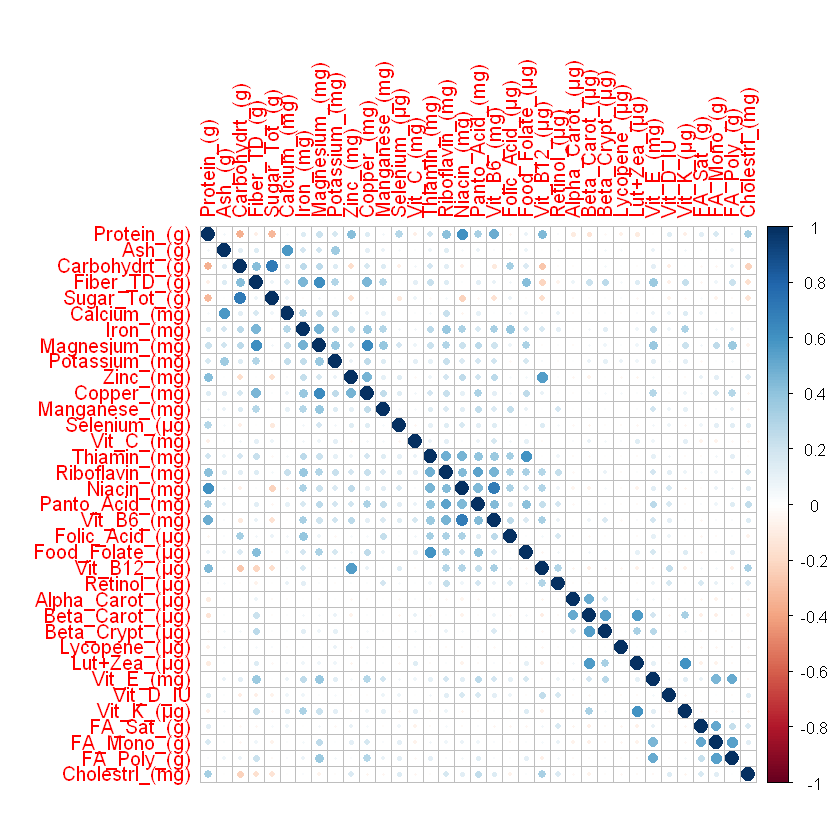

,Water_(g),Energ_Kcal,Folate_Tot_(µg),Folate_DFE_(µg),Lipid_Tot_(g),Phosphorus_(mg),Choline_Tot_(mg),Vit_A_RAE,Vit_A_IU,Vit_D_µg,Sodium_(mg)
Water_(g),1.000000000,-0.90999878,-0.294729657,-0.31314217,-0.5468886286,-0.28223937,-0.074565478,-0.003610119,0.076276508,0.0325053477,-0.179043250
Energ_Kcal,-0.909998777,1.00000000,0.189544367,0.20274782,0.8221166480,0.19152995,0.121253859,0.020559916,-0.094604991,-0.0173516949,0.039418710
Folate_Tot_(µg),-0.294729657,0.18954437,1.000000000,0.96758338,0.0066320778,0.10759617,0.052920572,0.129392182,0.053484859,0.0313521972,0.009734083
Folate_DFE_(µg),-0.313142170,0.20274782,0.967583377,1.00000000,-0.0041018497,0.09379115,0.023017341,0.142517182,0.045684037,0.0486624515,0.017131554
Lipid_Tot_(g),-0.546888629,0.82211665,0.006632078,-0.00410185,1.0000000000,0.12911857,0.137296424,0.062536538,-0.050080287,-0.0008983592,0.016184713
Phosphorus_(mg),-0.282239369,0.19152995,0.107596172,0.09379115,0.1291185659,1.00000000,0.180685679,0.020193946,-0.042028464,0.0833759912,0.144781008
Choline_Tot_(mg),-0.074565478,0.12125386,0.052920572,0.02301734,0.1372964245,0.18068568,1.000000000,0.084841183,-0.029199347,0.2146390848,0.007898956
Vit_A_RAE,-0.003610119,0.02055992,0.129392182,0.14251718,0.0625365381,0.02019395,0.084841183,1.000000000,0.740101489,0.1201097303,0.009461878
Vit_A_IU,0.076276508,-0.09460499,0.053484859,0.04568404,-0.0500802869,-0.04202846,-0.029199347,0.740101489,1.000000000,-0.0013569674,-0.008916736
Vit_D_µg,0.032505348,-0.01735169,0.031352197,0.04866245,-0.0008983592,0.08337599,0.214639085,0.120109730,-0.001356967,1.0000000000,-0.004337038


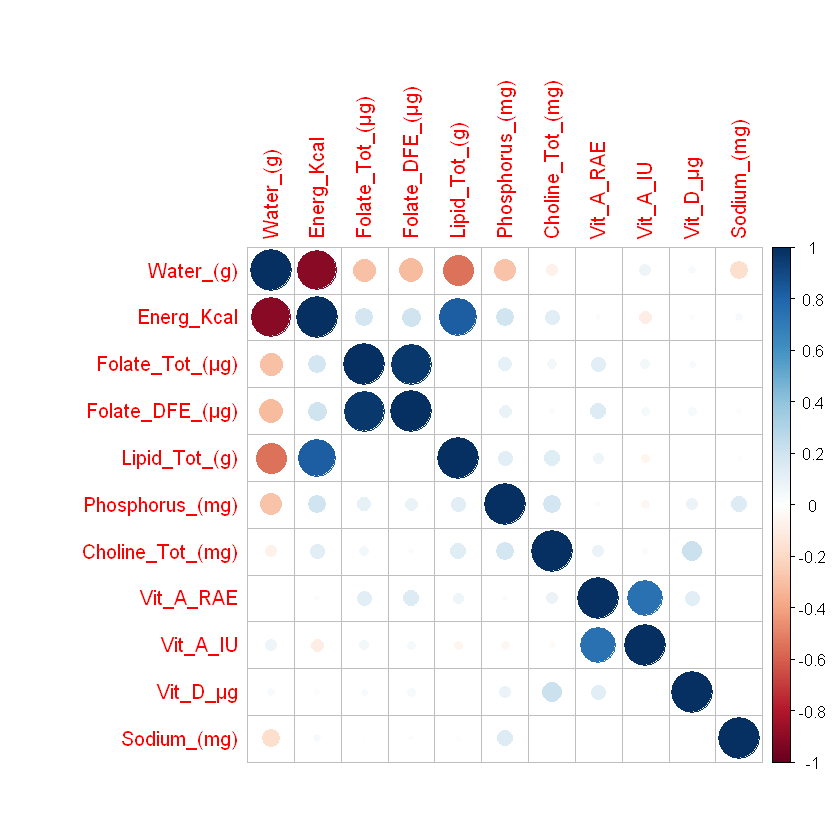

In [67]:
##############################################################################
# Preliminary Exploration of Data
##############################################################################
## Import Relevant Libraries 
library(car)
library(caret)
library(corrplot)
library(ISLR)
library(tidyverse)

## Set Seed for reproducibility
set.seed(123321)

## Check Dimension's of the Data
dim(SR)
dim(SRp)

## Preview the first 10 rows
head(SRp, 10)

## Preview 10 random rows
(SRp[sample(nrow(SRp), 10), ])

## Preview the last 10 rows
tail(SRp, 10)

## Numerical Summary of the Data
summary(SRp)

## Correlation Matrix Plot
# find high collinear variables
dropThese <- findCorrelation(cor(SRp), cutoff = 0.75)

# corrplot of features that aren't highly correlated to other features
corrplot(cor(SRp[,-dropThese]))

# corrplot of features that are highly correlated to other features
corrplot(cor(SRp[,dropThese])) 
cor(SRp[,dropThese])

## Scale and Center Data (needed for later PCA)
SRp <- data.frame(scale(SRp, center = TRUE, scale = TRUE))

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     2.7010 2.08186 2.04043 1.86272 1.62173 1.51520 1.3376
Proportion of Variance 0.1586 0.09422 0.09051 0.07543 0.05717 0.04991 0.0389
Cumulative Proportion  0.1586 0.25281 0.34332 0.41875 0.47592 0.52583 0.5647
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.28420 1.21403 1.21084 1.14433 1.07082 1.05335 1.01948
Proportion of Variance 0.03585 0.03204 0.03187 0.02847 0.02493 0.02412 0.02259
Cumulative Proportion  0.60058 0.63262 0.66449 0.69296 0.71789 0.74201 0.76460
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     0.99364 0.97480 0.94902 0.93525 0.8842 0.85429 0.81430
Proportion of Variance 0.02146 0.02066 0.01958 0.01902 0.0170 0.01587 0.01441
Cumulative Proportion  0.78607 0.80672 0.82630 0.84532 0.8623 0.87818 0.89260
                          PC22    PC23

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
Water_.g.,0.25460314,-0.030649880,0.275735871,-0.0244049168,0.0158023856,-0.120826592,0.019556963,-0.188041437,0.17236567,-0.039852757,...,-0.087166129,-0.0358333483,1.397059e-01,6.468417e-02,-7.745814e-01,-9.699277e-04,-3.524119e-04,-6.458704e-04,-2.655622e-05,-4.825874e-05
Energ_Kcal,-0.23217104,0.123951819,-0.304485403,-0.0885494474,0.1153632829,0.084026633,-0.033839902,0.094826029,-0.09933829,0.033389101,...,0.059846855,0.0009920859,-6.340626e-01,2.829830e-01,-4.714079e-01,-3.921920e-04,-2.614109e-04,-4.245799e-04,-1.080079e-04,-1.273608e-04
Protein_.g.,-0.13832714,0.263225869,0.188174696,-0.0688227059,-0.0599307489,-0.166649221,-0.077501332,0.099163557,-0.08643103,0.107018461,...,0.013743576,-0.0361712480,2.550920e-01,-5.992446e-02,-1.480405e-01,-3.937682e-04,-7.037654e-05,-3.353801e-04,9.539227e-06,5.356825e-05
Lipid_Tot_.g.,-0.16063707,0.185105935,-0.278239852,-0.2414205566,0.1490077278,0.003200098,-0.068918565,-0.133808821,0.06838099,0.025514755,...,-0.029181465,-0.0080465795,-5.065693e-02,-8.253504e-01,-1.150911e-01,1.261177e-03,5.813583e-04,-7.782514e-04,1.703748e-04,1.257370e-04
Ash_.g.,-0.10962435,-0.025576868,-0.047623246,0.0002234890,-0.4797746490,0.150294202,-0.231443440,-0.126778140,0.04223017,0.113591609,...,0.092782731,-0.7433551002,-1.112564e-02,1.037330e-02,-2.493854e-02,7.163873e-04,9.274405e-05,1.556101e-04,3.745134e-05,4.854239e-05
Carbohydrt_.g.,-0.12539693,-0.185198377,-0.236180806,0.1988645570,0.0037956474,0.186974324,0.093410743,0.277529828,-0.21184993,-0.036362063,...,0.100645176,-0.0156570225,5.449289e-01,-1.240138e-01,-3.568793e-01,-7.792409e-04,-2.730772e-04,-2.712571e-04,8.439780e-05,2.883045e-05
Fiber_TD_.g.,-0.18792946,-0.216355955,-0.107442527,0.0292432574,-0.0645653415,-0.191893953,0.174540153,-0.037501846,-0.04350149,-0.068674241,...,-0.191624915,-0.0013198263,-4.211971e-02,1.483538e-02,-2.534843e-02,2.132576e-04,4.144647e-05,-6.132843e-06,-3.391581e-05,3.750611e-06
Sugar_Tot_.g.,-0.02067393,-0.115511278,-0.207879778,0.1159356556,0.0127277010,0.231098735,0.093329068,0.333074498,-0.30290957,-0.115466167,...,-0.159019661,-0.0171682097,-2.696323e-02,5.171371e-03,-9.318598e-03,4.105216e-05,1.217832e-04,-3.683451e-05,2.365790e-05,2.267522e-05
Calcium_.mg.,-0.11297690,-0.033148530,-0.033195333,-0.0155171005,-0.4203592608,0.150206085,-0.064522928,-0.045263605,0.09993492,-0.084479287,...,0.554750662,0.2625381323,9.505016e-03,1.759757e-03,-2.722189e-02,-7.237008e-04,-1.913924e-04,-7.262487e-06,-8.411550e-05,-5.456168e-05
Iron_.mg.,-0.22064970,-0.084132847,0.049783200,0.0421019451,-0.0862671324,-0.052696468,0.147985789,0.153930130,0.18460401,0.002675676,...,-0.183464384,0.0006575262,1.605699e-03,-2.685370e-03,1.336901e-03,-2.969678e-04,3.894966e-05,-7.090426e-05,3.001109e-05,-9.926471e-05


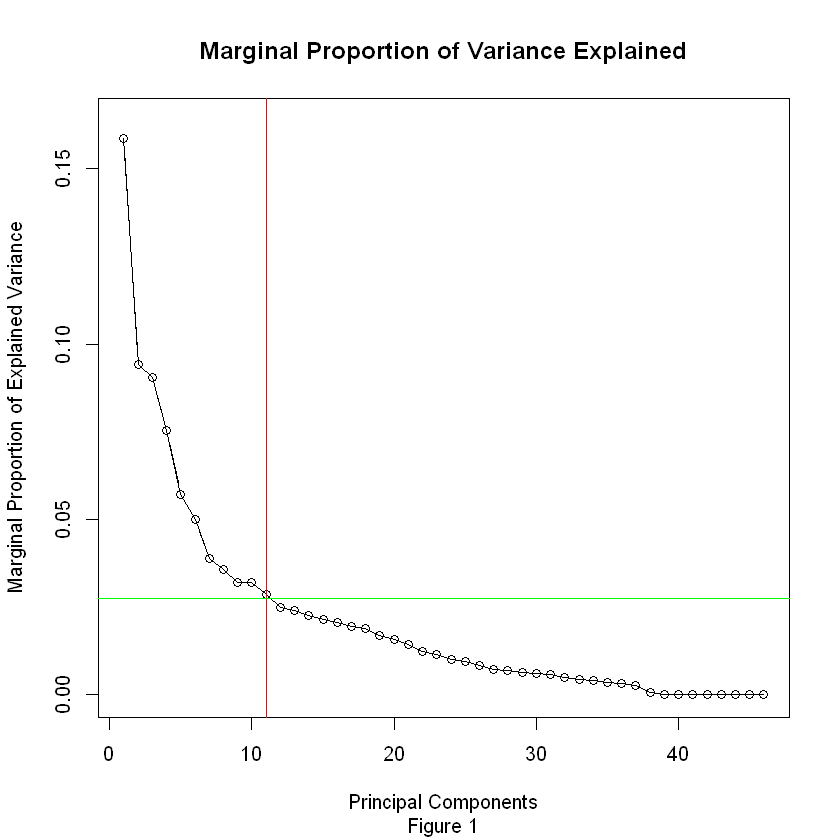

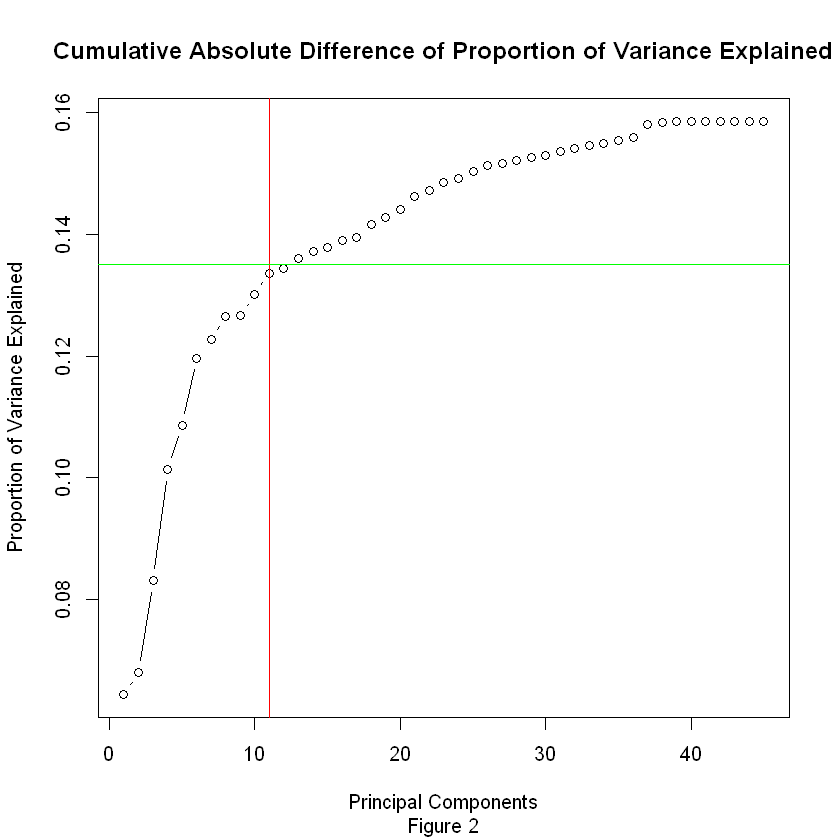

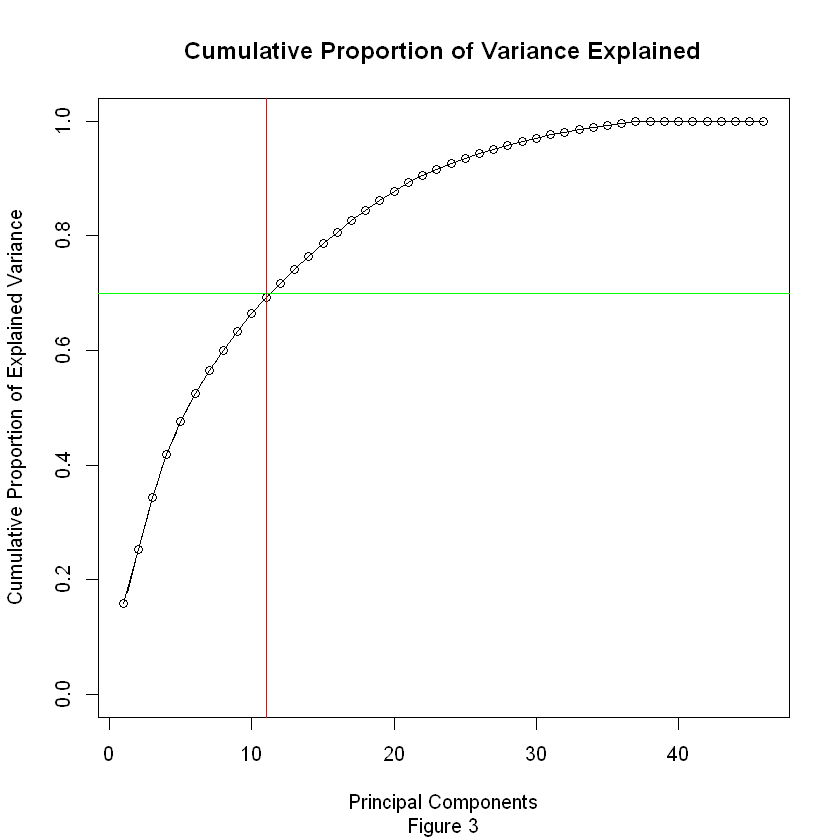

In [153]:
##############################################################################
# Principal Components Analysis
##############################################################################
## Perform Principal Components Analysis
pca.output <- prcomp(SRp, scale=FALSE)

# get a summary of the PCA procedure
(summary(pca.output))
(pca.output$rotation)

# find out the proportion of variance explained by each principal component and the cumulative sum
pca.var.explained <- pca.output$sdev^2
pca.prop.var.explained <- pca.var.explained/(sum(pca.var.explained))

# plot the proportion of variance explained by each principal component
plot((pca.prop.var.explained),
     main="Marginal Proportion of Variance Explained",
     sub="Figure 1",
     xlab="Principal Components",
     ylab="Marginal Proportion of Explained Variance",
     ylim=(c(0, max(pca.prop.var.explained)+0.005)),
     type='b')
lines(pca.prop.var.explained)
abline(v=11, col='red')
abline(h=0.0275, col='green')

plot(cumsum(abs(diff(pca.prop.var.explained))),
     main="Cumulative Absolute Difference of Proportion of Variance Explained",
     sub="Figure 2",
     xlab="Principal Components",
     ylab="Proportion of Variance Explained",
     type='b')
abline(v=11, col='red')
abline(h=0.135, col='green')


# plot the cumulative proportion of variance explained by each principal component
plot(cumsum(pca.prop.var.explained),
     main="Cumulative Proportion of Variance Explained",
     sub="Figure 3",
     xlab="Principal Components",
     ylab="Cumulative Proportion of Explained Variance",
     ylim=c(0,1),
     type='b')
lines(cumsum(pca.prop.var.explained))
abline(h=0.70, col='green')
abline(v=11, col='red')

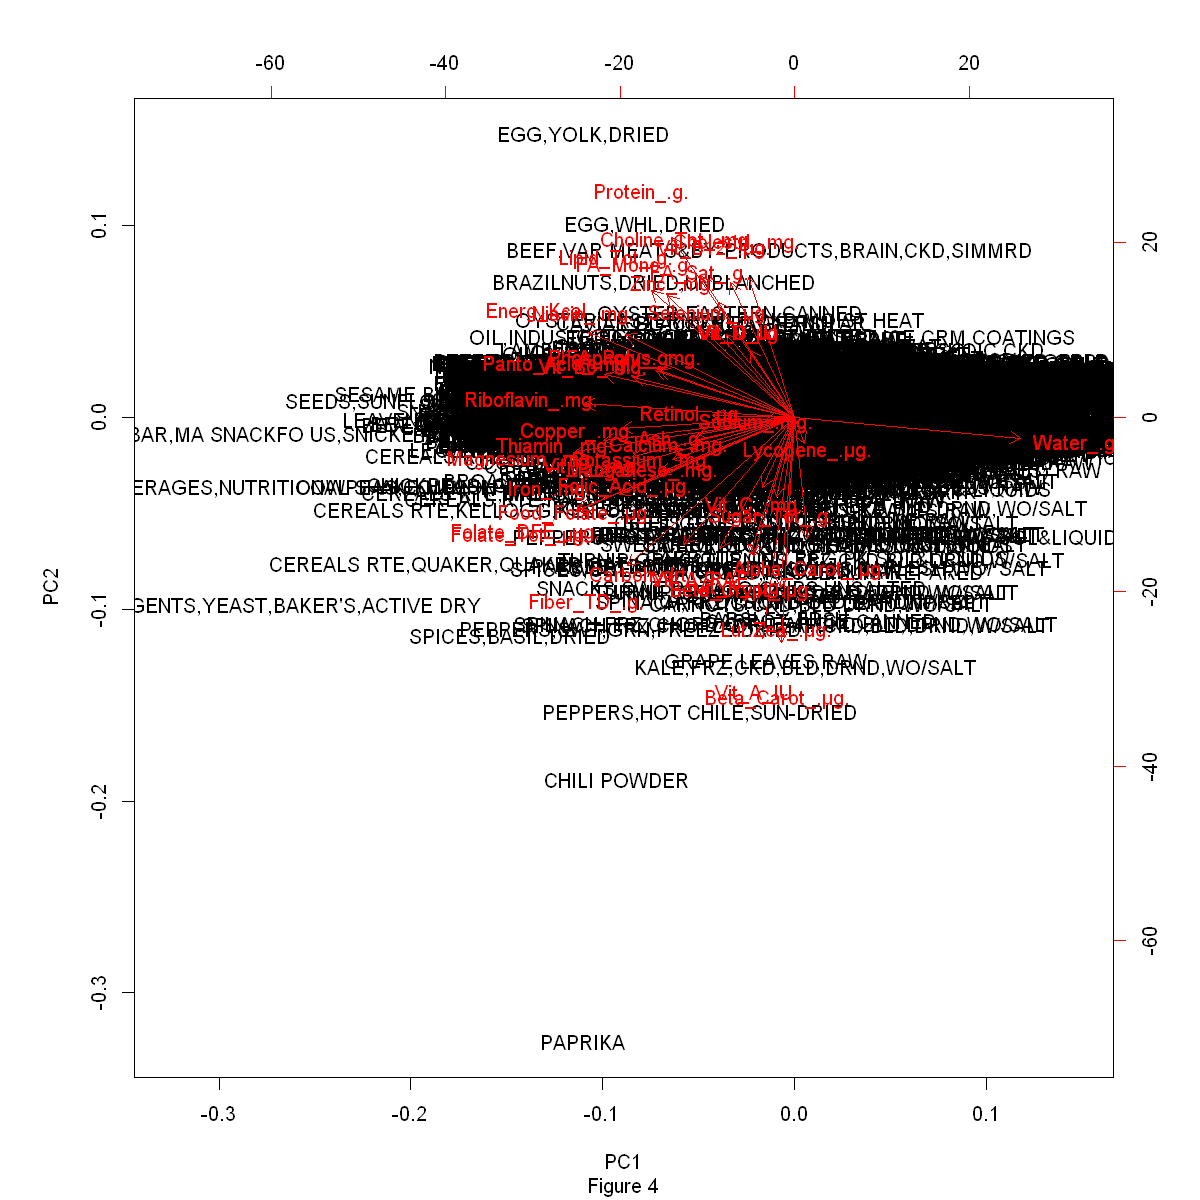

In [231]:
##############################################################################
# Principal Components Analysis Visualization
##############################################################################
biplot(pca.output, sub="Figure 4")

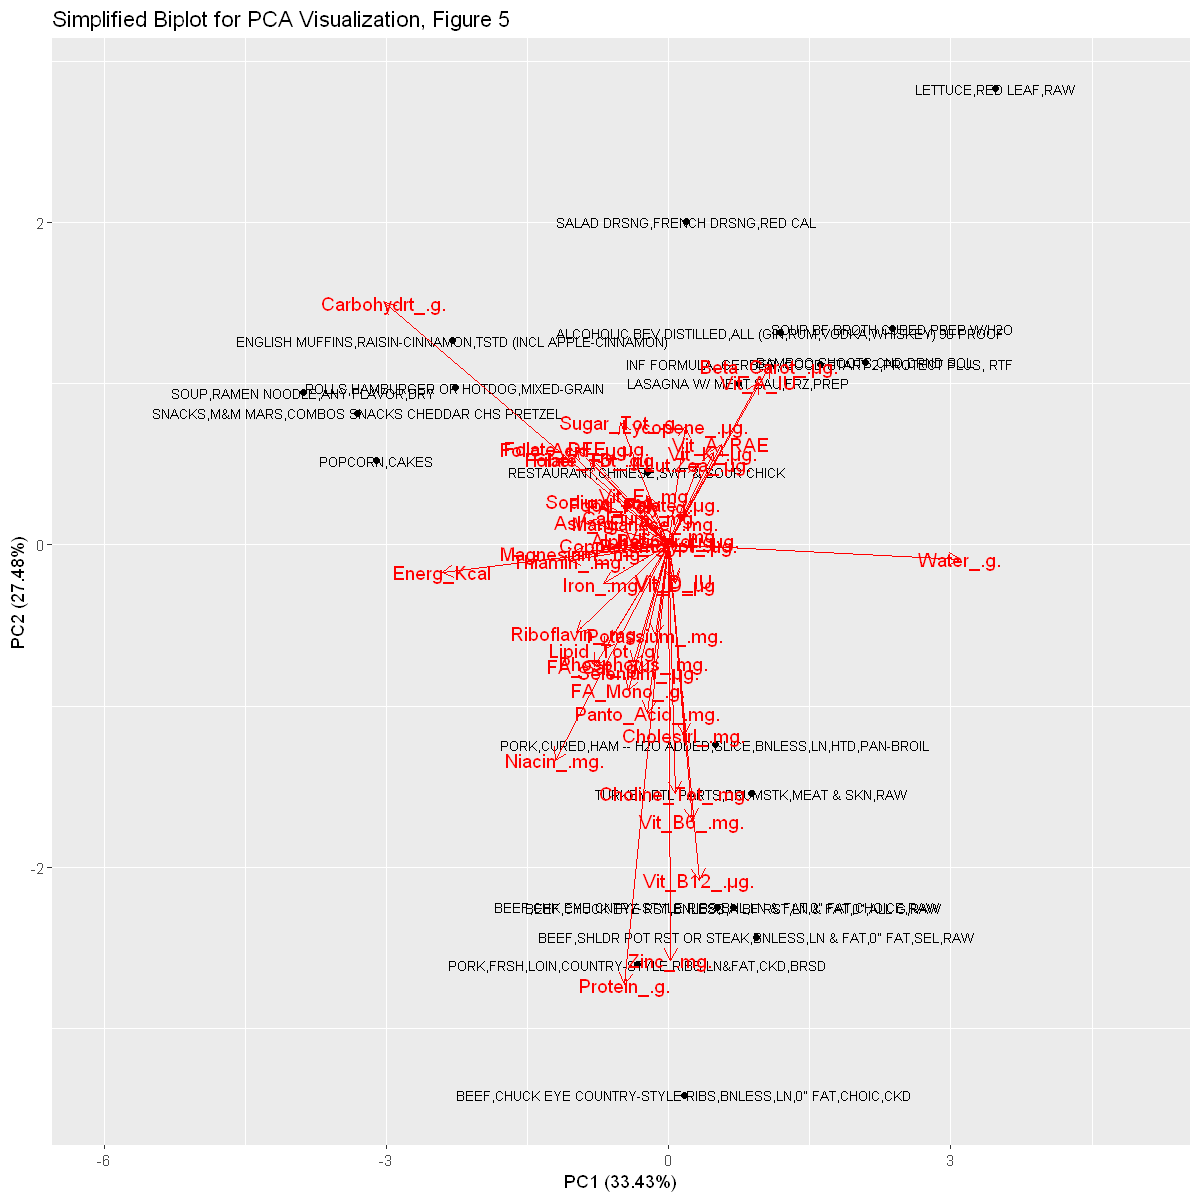

In [230]:
##############################################################################
# Simplified Principal Components Analysis Visualization
##############################################################################
library(ggfortify)
options(repr.plot.width=10, repr.plot.height=10)
set.seed(123456)
autoplot(prcomp(SRp[sample(1:nrow(SRp), 20, replace=FALSE),]),
         label = TRUE, label.size = 2.75, loadings=TRUE,
         loadings.label = TRUE, loadings.label.size = 4, scale=0, xlim=c(-6, 5),
         main="Simplified Biplot for PCA Visualization, Figure 5")